## Importing the Dependencies

In [15]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [16]:
kaggle_config = json.load(open("C:/Users/KIIT0001/Desktop/ML/Music Recomendation App/src/kaggle.json"))  # login to kaggle > verify account > profile icon > settings > create new API toke

In [17]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [18]:
# Set Kaggle credentials as environment variables
os.environ['KAGGLE_USERNAME'] = "priyanshusekharray"
os.environ['KAGGLE_KEY'] = "922ebd324219bb9c181fa9b6cfb5148c"

In [19]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
import zipfile
import os

with zipfile.ZipFile("spotify-million-song-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

print("✅ Unzipped successfully")


✅ Unzipped successfully


In [21]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("spotify_millsongdata.csv")

In [22]:
df.shape

(57650, 4)

In [23]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [25]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [26]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [27]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [28]:
df.shape

(10000, 3)

In [29]:
df.head()

,artist,song,text
0,Beach Boys,Back Home,Yeah yeah yeah \r\nWell I'm going back this s...
1,Coldplay,2000 Miles,"She's gone 2000 miles, it's very far \r\nThe ..."
2,Marillion,That Time Of The Night,At that time of the night \r\nWhen streetligh...
3,Perry Como,A Garden In The Rain,"'Twas just a garden in the rain, \r\nClose to..."
4,You Am I,How Much Is Enough,Would it stain \r\nIf the lights fell down on...


In [30]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

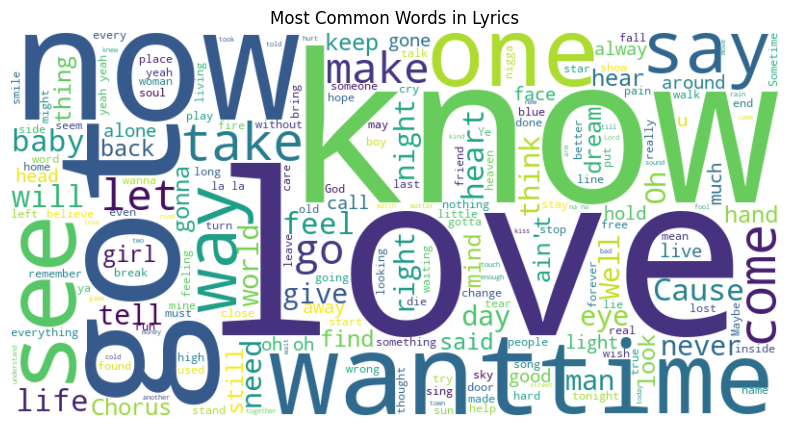

In [31]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()
     

In [32]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)
     

In [35]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [36]:
df.head()

,artist,song,text,cleaned_text
0,Beach Boys,Back Home,Yeah yeah yeah \r\nWell I'm going back this s...,yeah yeah yeah well im going back summer ohio ...
1,Coldplay,2000 Miles,"She's gone 2000 miles, it's very far \r\nThe ...",shes gone miles far snow came gets colder day ...
2,Marillion,That Time Of The Night,At that time of the night \r\nWhen streetligh...,time night streetlights throw crosses window f...
3,Perry Como,A Garden In The Rain,"'Twas just a garden in the rain, \r\nClose to...",twas garden rain close little leafy lane touch...
4,You Am I,How Much Is Enough,Would it stain \r\nIf the lights fell down on...,would stain lights fell name face began look m...


In [37]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [38]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [39]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [40]:
df["song"][2]

'That Time Of The Night'

In [41]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
                  artist                          song
9012     John Mellencamp  Hard Times For An Honest Man
1723             Rihanna                          Hard
623          Johnny Cash                    Hard Times
4137  Christina Aguilera              Underappreciated
9898        Donna Summer            I Don't Wanna Work
